In [42]:
!pip install category_encoders

In [43]:
!pip install catboost

## **Bank Marketing Campaign***

## Business Problem Understanding

**Context**

Bank merupaka sebuah lembaga intermediasi keuangan umumnya didirikan dengan kewenangan menerima simpanan uang, meminjamkan uang, dan menerbitkan promes atau yang dikenal sebagai banknote. Kata bank berasal dari bahasa Italia banca yang berarti tempat penukaran uang.

Di era yang berkembang sepeti saat ini, Bank harus bisa bersaing dengan kompetitor-kompetitor lainnya. Slah satu caranya dengan strategi pemasaran.

**Problem Statement**

Dalam menaikan profit bank, maka bank memerlukan strategy dalam meningkatkan profit. Salah satunya dengan melakukan kampanye pemasaran. Saat ingin melakukan kampanye pemasaran bank memerlukan targa kepada semua nasabahnya. Cara itu membuat expense perusahaan melonjak. Oleh karena itu saat dilakukan pemasaran, bank harus bisa melakukan target yang tepat sasaran.

Untuk meningkatkan ketepatan dan efesiensi yang maksimal dalam kampanye pemasaran, perusahaan juga harus mencari peluang target yang tinggi.

**Goals**

Banyaknya nasabah yang dimiliki bank sangat menghabiskan waktu dan memerlukan biaya tambahan jika perusahaan menggunakan vendor atau jasa dalam menyaring nasabah yang memiliki tepat sasaran. Oleh sebab itu perusahaan bank harus bisa mem-forcasting nasabah dengan karakter seperti apa yang bisa menjadi target dalam melakukan kampanye pemasaran.

Setelah itu perusahaan dapat mengetahui profile atau segmen mana saja yang membuat nasabah ingin atau tidak melakukan deposit. Sehingga perusahaan bisa membuat semacam Business Plan berdasarkan pengelompokan target nasabah yang sudah dibuat.

**Analytic Approach**

Dalam melakukan analisa yang akan dibuat, maka kita didorong untuk melihat pattern apa yang akan membedakan nasabah yang ingin deposit atau tidak ingin melakukan deposit.
Setelah itu kita membuat pengelompokan yang menunjang dalam mem-forcasting hal tersebut. Menmaksimalkan sumber data yang kita miliki.

Lalu kita juga bisa melihat keakuratan dari setiap pattern nasabah saat kita melakukan pengolahan data.

**Metric Evaluation**

Target :
* 0 : Nasabah tidak deposit
* 1 : Nasabah deposit

Type Error:
* FP (False Positive): Nasabah diprediksi akan melakukan deposit, tetapi kenyataannya tidak.
Konsekuensi FP: Waktu dan sumber daya yang dialokasikan untuk nasabah tersebut akan terbuang percuma.

* FN (False Negative): Nasabah diprediksi tidak akan melakukan deposit, tetapi kenyataannya melakukan deposit.
Konsekuensi FN: Bank akan kehilangan peluang untuk mendapatkan keuntungan dari nasabah yang sebenarnya melakukan deposit.

Mempertimbangkan konsekuensi ini, baik recall maupun presisi sangat krusial dalam kasus ini, sehingga kita akan menerapkan metrik F-Score. Perlu dicatat bahwa tujuan utama kampanye pemasaran bank ini adalah untuk menarik lebih banyak nasabah agar melakukan deposit. Oleh karena itu, kita akan merancang model yang dapat mengidentifikasi sebanyak mungkin kelas positif yang benar serta meminimalkan prediksi false positive dan false negative.

Selain itu, prioritas kita adalah mengurangi False Negative agar bank tidak kehilangan kesempatan mendapatkan nasabah yang melakukan deposit. Karena False Negative menjadi prioritas utama, recall dari model akan lebih diutamakan untuk ditingkatkan. Oleh sebab itu, metrik F-Score yang digunakan adalah F2-Score.


## *Data Understanding and Cleaning*

Sebelum memulai analisis, penting untuk melakukan pemahaman yang mendalam terhadap dataset yang akan digunakan dalam tahap data understanding. Dengan melakukan ini, kita dapat mengidentifikasi anomali atau ketidaknormalan dalam dataset yang memerlukan penanganan selama tahap data cleaning. Setiap tindakan penanganan anomali yang diambil harus didukung dengan justifikasi yang kuat, baik berdasarkan pengetahuan domain maupun analisis statistik, untuk memastikan integritas dan kualitas data yang optimal.

| *Attribute* | *Data Type* | *Description* |
| ---       | ---       | ---        
| age       | Integer   | Usia  |
| job       | Object    | Pekerjaan  |
| balance   | Integer   | Saldo  |
| housing   | Object    | Mempunyai kredit Rumah atau tidak |
| loan      | Object    | Mempunyai pinjaman atau tidak |
| contact   | Object    | Tindakan komunikasi terbaru yang dilakukan terhadap nasabah.|
| month     | Object    | Bulan terakhir  berhubungan dengan nasabah. |
| campaign  | Integer   | Total interaksi yang dilakukan dengan nasabah selama kampanye.e |
| pdays     | Integer   | Total hari setelah nasabah dihubungi sejak kampanye terakhir |
| poutcome  | Object    | Hasil dari kampanye terakhir |
| deposit   | Object    | Melakukan deposit atau tidak |

In [44]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from sklearn.preprocessing import OneHotEncoder, RobustScaler, KBinsDiscretizer
from category_encoders import BinaryEncoder, OrdinalEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold, train_test_split, cross_val_score, cross_validate
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score, precision_score, roc_auc_score, roc_curve, make_scorer, fbeta_score, ConfusionMatrixDisplay, accuracy_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
import warnings
warnings.filterwarnings("ignore")

In [5]:
import pandas as pd
from google.colab import files
filenya = files.upload()

Saving data_bank_marketing_campaign.csv to data_bank_marketing_campaign.csv


In [6]:
path="/content/data_bank_marketing_campaign.csv"
df=pd.read_csv(path)
df

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no


In [7]:
df.info()#Melakukan pengecheck-an pada data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


In [8]:
df["deposit"].value_counts().reset_index() #Pengecheck-an Balance Data

,deposit,count
0,no,4081
1,yes,3732


In [9]:
df_duplicate = df[df.duplicated(keep = False)].sort_values("age") #Pengecheck-an data duplikat
display(df_duplicate, f"Total yang mempunyai data duplikat : {len(df[df.duplicated()])}")

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
2486,30,blue-collar,239,yes,no,unknown,may,1,-1,unknown,yes
7077,30,blue-collar,239,yes,no,unknown,may,1,-1,unknown,yes
1468,34,management,0,no,no,cellular,aug,2,-1,unknown,no
5905,34,management,0,no,no,cellular,aug,2,-1,unknown,no
223,38,technician,0,no,no,cellular,aug,2,-1,unknown,no
5681,38,technician,0,no,no,cellular,aug,2,-1,unknown,no
1381,39,technician,0,yes,no,unknown,may,1,-1,unknown,no
5609,39,technician,0,yes,no,unknown,may,1,-1,unknown,no
330,40,blue-collar,0,yes,no,unknown,may,2,-1,unknown,no
2944,40,blue-collar,0,yes,no,unknown,may,2,-1,unknown,no


'Total yang mempunyai data duplikat : 8'


Dalam dataset ini, kami menemukan bahwa terdapat data duplikat dengan saldo yang sama, status kredit rumah yang sama, dan status pinjaman yang sama. Bahkan, beberapa kampanye pemasaran yang diarahkan kepada mereka juga serupa. Untuk fitur seperti pekerjaan (job), kepemilikan rumah (housing), pinjaman (loan), bulan (month), dan beberapa fitur kategorikal lainnya, kesamaan data masih bisa diterima. Namun, ketika melihat fitur saldo (balance) yang merupakan data numerik kontinu, sangat kecil kemungkinannya ada nasabah dengan saldo yang sama, umur yang sama, dan beberapa fitur lain yang juga sama. Oleh karena itu, delapan data duplikat ini akan dihapus.

In [10]:
len_before = len(df)
df = df.drop_duplicates()
len_after = len(df)
print(f"Panjang  data duplikat sebelum dilakukan penghapusan : {len_before}")
print(f"Panjang  data duplikat setelah dilakukan penghapusan : {len_after}")

Panjang  data duplikat sebelum dilakukan penghapusan : 7813
Panjang  data duplikat setelah dilakukan penghapusan : 7805


In [11]:
import matplotlib.pyplot as plt


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

### Pengecheck-an data outlier ada atau tidak
Terdapat 4 kolom yang merupakan data numerical yaitu balance, campaign, age, dan pdays

<Axes: ylabel='pdays'>

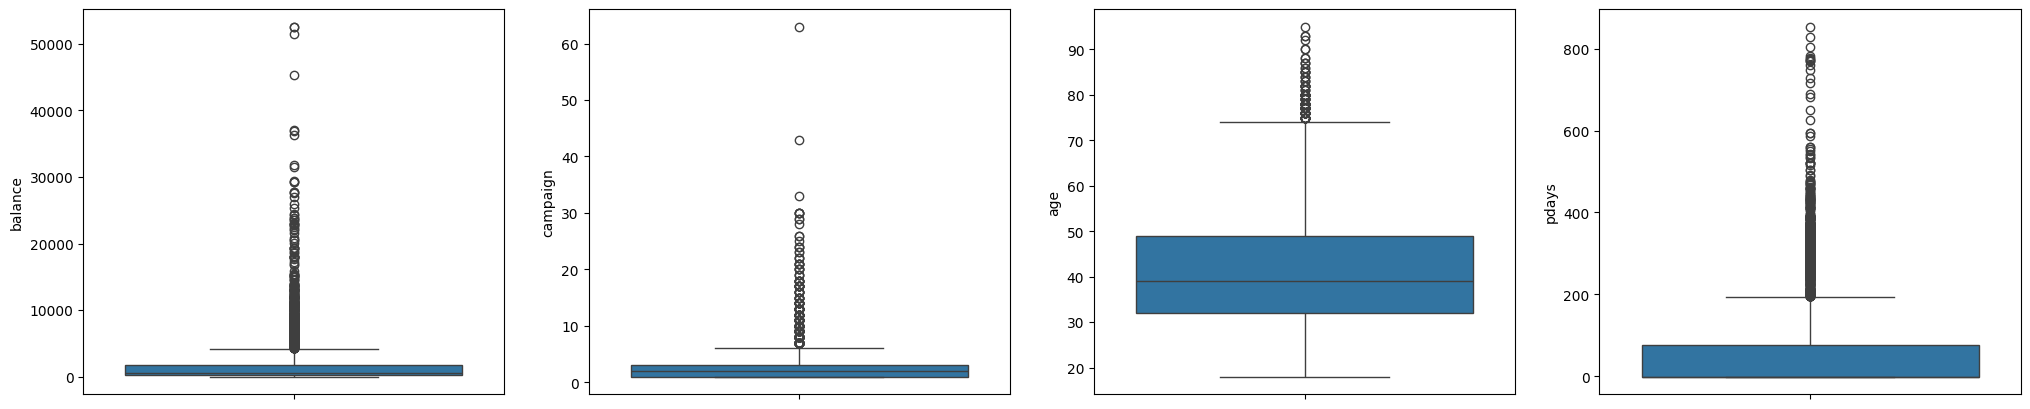

In [89]:
fig, ax = plt.subplots(1, 4, figsize=(25, 5))
sns.boxplot(data=df, y="balance", ax=ax[0])
sns.boxplot(data=df, y="campaign", ax=ax[1])
sns.boxplot(data=df, y="age", ax=ax[2])
sns.boxplot(data=df, y="pdays", ax=ax[3])

In [14]:
#Baris kode ini berfungsi untuk menghapus baris dari DataFrame df yang memiliki nilai maksimum di kolom "balance".
df = df.drop(df[df["balance"] == df["balance"].max()].index)
#Baris kode ini mengurutkan DataFrame df berdasarkan kolom "balance" dalam urutan menurun.
df.sort_values("balance", ascending = False)

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
3335,61,self-employed,52587,no,no,cellular,aug,1,-1,unknown,yes
5683,61,self-employed,52587,no,no,cellular,feb,3,189,success,yes
178,56,entrepreneur,51439,no,yes,cellular,jul,1,-1,unknown,no
6677,39,technician,45248,yes,no,unknown,may,1,-1,unknown,yes
1008,75,retired,37127,no,no,cellular,feb,1,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
935,51,technician,-1944,yes,no,cellular,may,1,-1,unknown,yes
4243,49,entrepreneur,-1965,no,yes,telephone,jul,2,-1,unknown,no
6761,51,management,-2282,yes,yes,cellular,jul,6,-1,unknown,no
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes


In [15]:
df[df["balance"]<0].sort_values("balance")
#memfilter baris-baris dalam DataFrame df di mana nilai kolom "balance" kurang dari 0, dan kemudian mengurutkan

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
7499,49,management,-6847,no,yes,cellular,jul,1,-1,unknown,no
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
6761,51,management,-2282,yes,yes,cellular,jul,6,-1,unknown,no
4243,49,entrepreneur,-1965,no,yes,telephone,jul,2,-1,unknown,no
935,51,technician,-1944,yes,no,cellular,may,1,-1,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...
7662,32,technician,-1,yes,no,cellular,may,1,-1,unknown,no
2758,57,technician,-1,no,no,unknown,may,2,-1,unknown,yes
3397,34,blue-collar,-1,yes,no,cellular,may,6,355,other,yes
4185,56,blue-collar,-1,no,no,cellular,jul,3,-1,unknown,no


In [16]:
df = df.drop(df[df["balance"]<0].sort_values("balance").index)

In [17]:
len(df)

7325

In [18]:
df[df["age"] > 75].sort_values("age", ascending = False)

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
3371,95,retired,2282,no,no,telephone,apr,17,-1,unknown,yes
546,93,retired,775,no,no,cellular,aug,2,13,success,yes
1565,93,retired,775,no,no,cellular,jul,2,177,success,yes
1462,92,retired,775,no,no,cellular,jan,4,96,success,yes
7303,90,retired,712,no,no,telephone,mar,1,-1,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...
4101,76,retired,802,no,no,cellular,mar,1,181,success,yes
5484,76,retired,1492,no,no,telephone,nov,1,-1,unknown,yes
1847,76,retired,2302,no,no,telephone,feb,1,87,failure,no
2047,76,housemaid,1411,no,no,telephone,apr,3,-1,unknown,yes


In [19]:
df[df["pdays"] == -1]

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
6,37,admin.,4803,no,no,cellular,jan,2,-1,unknown,yes
8,35,management,805,no,no,cellular,sep,1,-1,unknown,no
9,57,housemaid,0,no,no,unknown,jun,1,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7807,33,management,0,yes,yes,cellular,may,2,-1,unknown,no
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no


In [20]:
df.sort_values('pdays', ascending = False).head(20)

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
7409,37,management,488,yes,no,cellular,sep,1,854,failure,yes
1175,34,blue-collar,320,yes,no,cellular,aug,1,828,failure,yes
6918,32,technician,1547,no,no,cellular,oct,1,805,other,yes
399,31,blue-collar,0,yes,no,unknown,aug,1,782,other,yes
1324,27,blue-collar,821,yes,yes,unknown,sep,1,778,other,no
3315,37,technician,432,yes,no,cellular,jul,3,776,failure,yes
5768,36,management,335,no,no,unknown,oct,1,772,failure,no
3165,35,management,1120,no,no,unknown,sep,1,771,success,no
7115,38,management,1477,no,no,cellular,sep,3,769,failure,yes
4683,60,services,4256,yes,no,cellular,aug,3,761,other,yes


In [21]:
df.sort_values("campaign", ascending = False).head(20)

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
548,45,management,9051,yes,no,unknown,may,63,-1,unknown,no
6901,51,blue-collar,41,yes,no,telephone,jul,43,-1,unknown,no
1599,49,services,933,no,yes,cellular,jul,33,-1,unknown,no
2371,35,management,3168,no,no,cellular,aug,30,-1,unknown,no
6288,33,technician,34,no,no,cellular,aug,30,-1,unknown,no
67,51,services,7,yes,no,cellular,jul,30,-1,unknown,no
2564,44,services,608,yes,yes,unknown,jun,30,-1,unknown,no
4711,46,housemaid,271,yes,no,cellular,jul,29,-1,unknown,yes
6480,58,admin.,1464,yes,yes,unknown,jun,29,-1,unknown,no
304,38,blue-collar,1686,yes,no,unknown,jun,28,-1,unknown,no


In [22]:
df["deposit"].value_counts() #Dilakukan pengecheck-an kembali dan masih balance

deposit
no     3735
yes    3590
Name: count, dtype: int64

In [23]:
df.isna().sum() #Pengecheck-an missing value

age         0
job         0
balance     0
housing     0
loan        0
contact     0
month       0
campaign    0
pdays       0
poutcome    0
deposit     0
dtype: int64

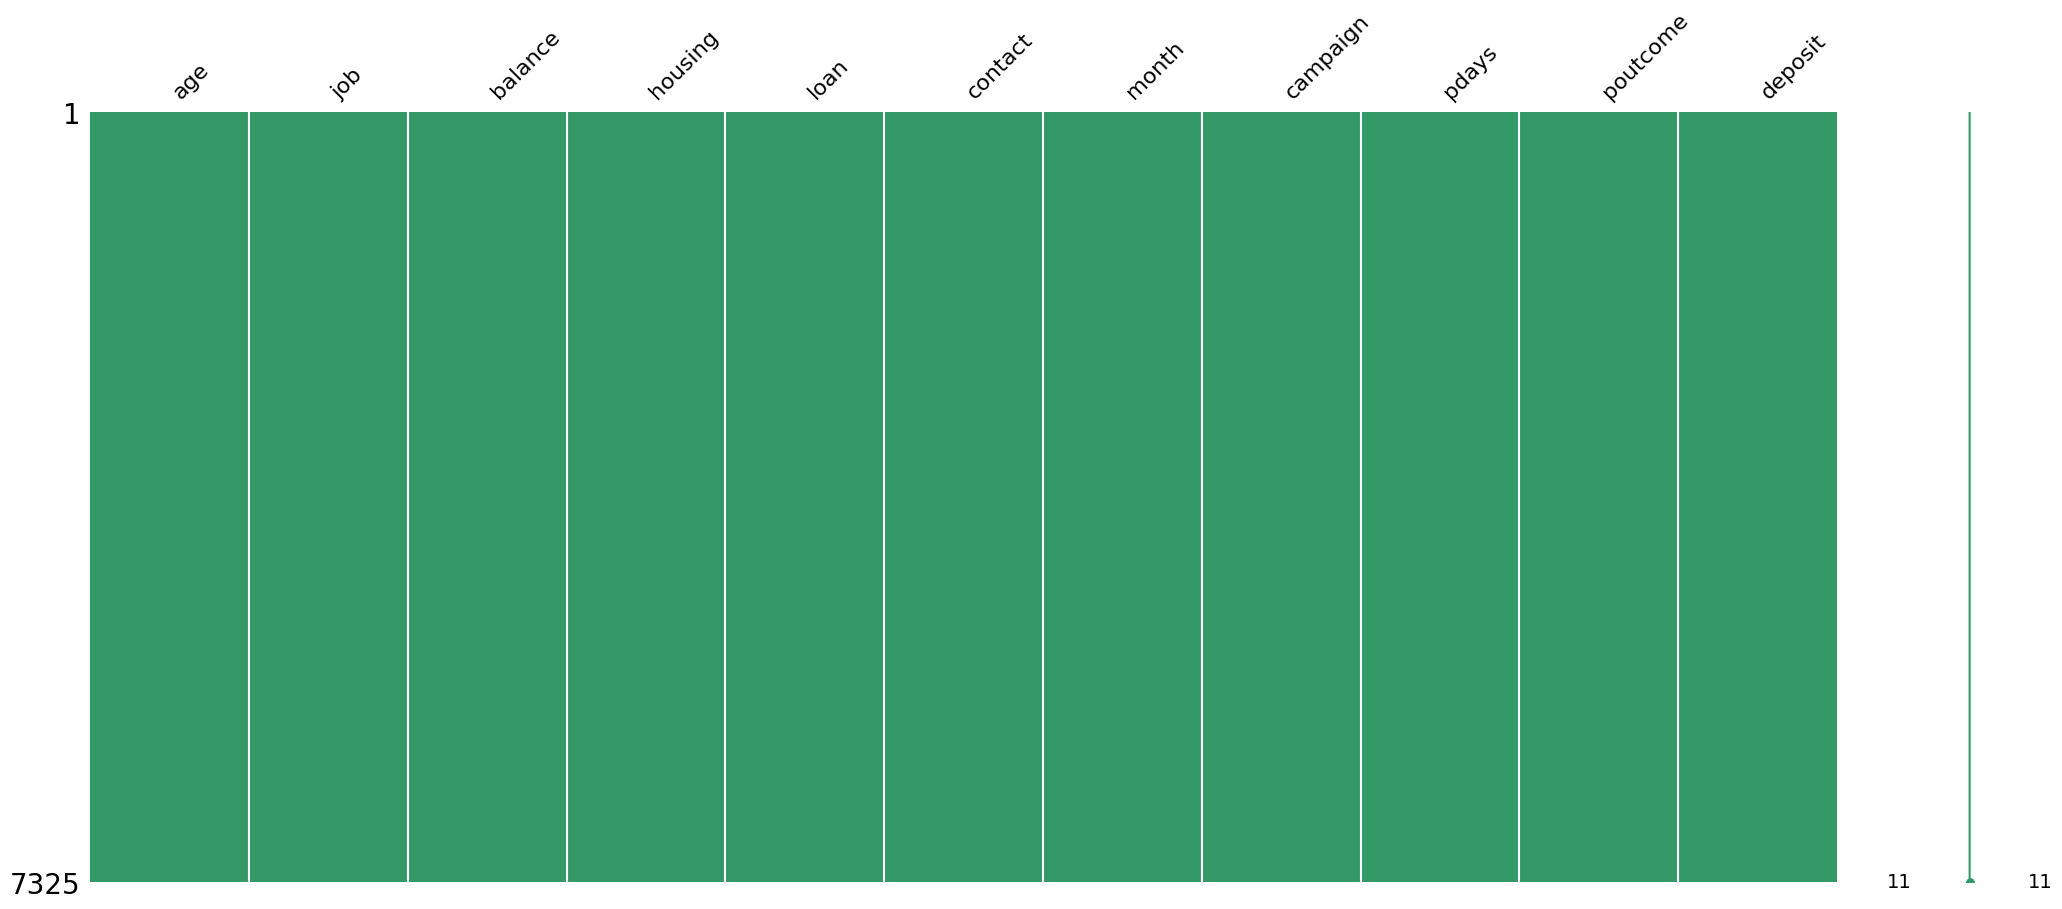

In [90]:
import missingno
import matplotlib.pyplot as plt
missingno.matrix(df, color=(0.2, 0.6, 0.4))
plt.show()

### Check Tipe Data

In [91]:
pd.set_option('display.max_colwidth', None) #DataFrame yang berisi informasi tentang nilai unik dalam kolom-kolom objek dari DataFrame df, termasuk nama kolom, jumlah nilai unik, dan contoh-contoh nilai unik tersebut.

listItem = []
for col in df.describe(include='object').columns:
    listItem.append([col, df[col].nunique(), df[col].unique()])

unique_val = pd.DataFrame(columns=['Name', 'Unique Number', 'Unique Sample'], data=listItem)
unique_val
#DataFrame yang berisi informasi tentang nilai unik dalam kolom-kolom objek dari DataFrame df, termasuk nama kolom, jumlah nilai unik, dan contoh-contoh nilai unik tersebut.

,Name,Unique Number,Unique Sample
0,job,12,"[admin., housemaid, technician, management, student, services, blue-collar, entrepreneur, retired, unemployed, self-employed, other]"
1,housing,2,"[no, yes]"
2,loan,2,"[no, yes]"
3,contact,3,"[cellular, telephone, other]"
4,month,12,"[jun, may, nov, jan, sep, feb, mar, aug, apr, jul, oct, dec]"
5,poutcome,4,"[unknown, other, failure, success]"



Terdapat beberapa nilai dalam kolom objek yang berupa 'unknown' dan 'other'. Untuk menjaga konsistensi data, kami akan mengganti nilai 'unknown' menjadi 'other' dalam kolom 'job' dan 'contact'. Namun, kolom 'poutcome' tidak akan diubah karena konotasinya berbeda. 'Unknown' dalam kolom ini menunjukkan bahwa hasil dari kampanye sebelumnya belum diketahui setelah pelanggan dihubungi, sementara 'other' menunjukkan bahwa ada hasil dari kampanye sebelumnya namun tidak termasuk dalam kategori 'failure' atau 'success'.

In [26]:
def unknowns(x):
    if x == "unknown":
        x = "other"
    return x
df["contact"] = df["contact"].apply(unknowns)
df["contact"].unique()


array(['cellular', 'telephone', 'other'], dtype=object)

In [27]:
df["job"] = df["job"].apply(unknowns)
df["job"].unique()

array(['admin.', 'housemaid', 'technician', 'management', 'student',
       'services', 'blue-collar', 'entrepreneur', 'retired', 'unemployed',
       'self-employed', 'other'], dtype=object)

## Analysis Data

In [28]:
display(df.describe(), df.describe(include = "object"))

,age,balance,campaign,pdays
count,7325.00000,7325.000000,7325.000000,7325.000000
mean,41.35686,1626.027577,2.506348,52.396451
std,12.05264,3057.490750,2.713091,108.360776
min,18.00000,0.000000,1.000000,-1.000000
25%,32.00000,187.000000,1.000000,-1.000000
50%,39.00000,620.000000,2.000000,-1.000000
75%,49.00000,1808.000000,3.000000,77.000000
max,95.00000,52587.000000,63.000000,854.000000


,job,housing,loan,contact,month,poutcome,deposit
count,7325,7325,7325,7325,7325,7325,7325
unique,12,2,2,3,12,4,2
top,management,no,no,cellular,may,unknown,no
freq,1716,4014,6455,5332,1768,5396,3735


Terlihat data diatas dapat disimpulkan beberapa point: Seperti umur Max 95 dan Min 18 dsb


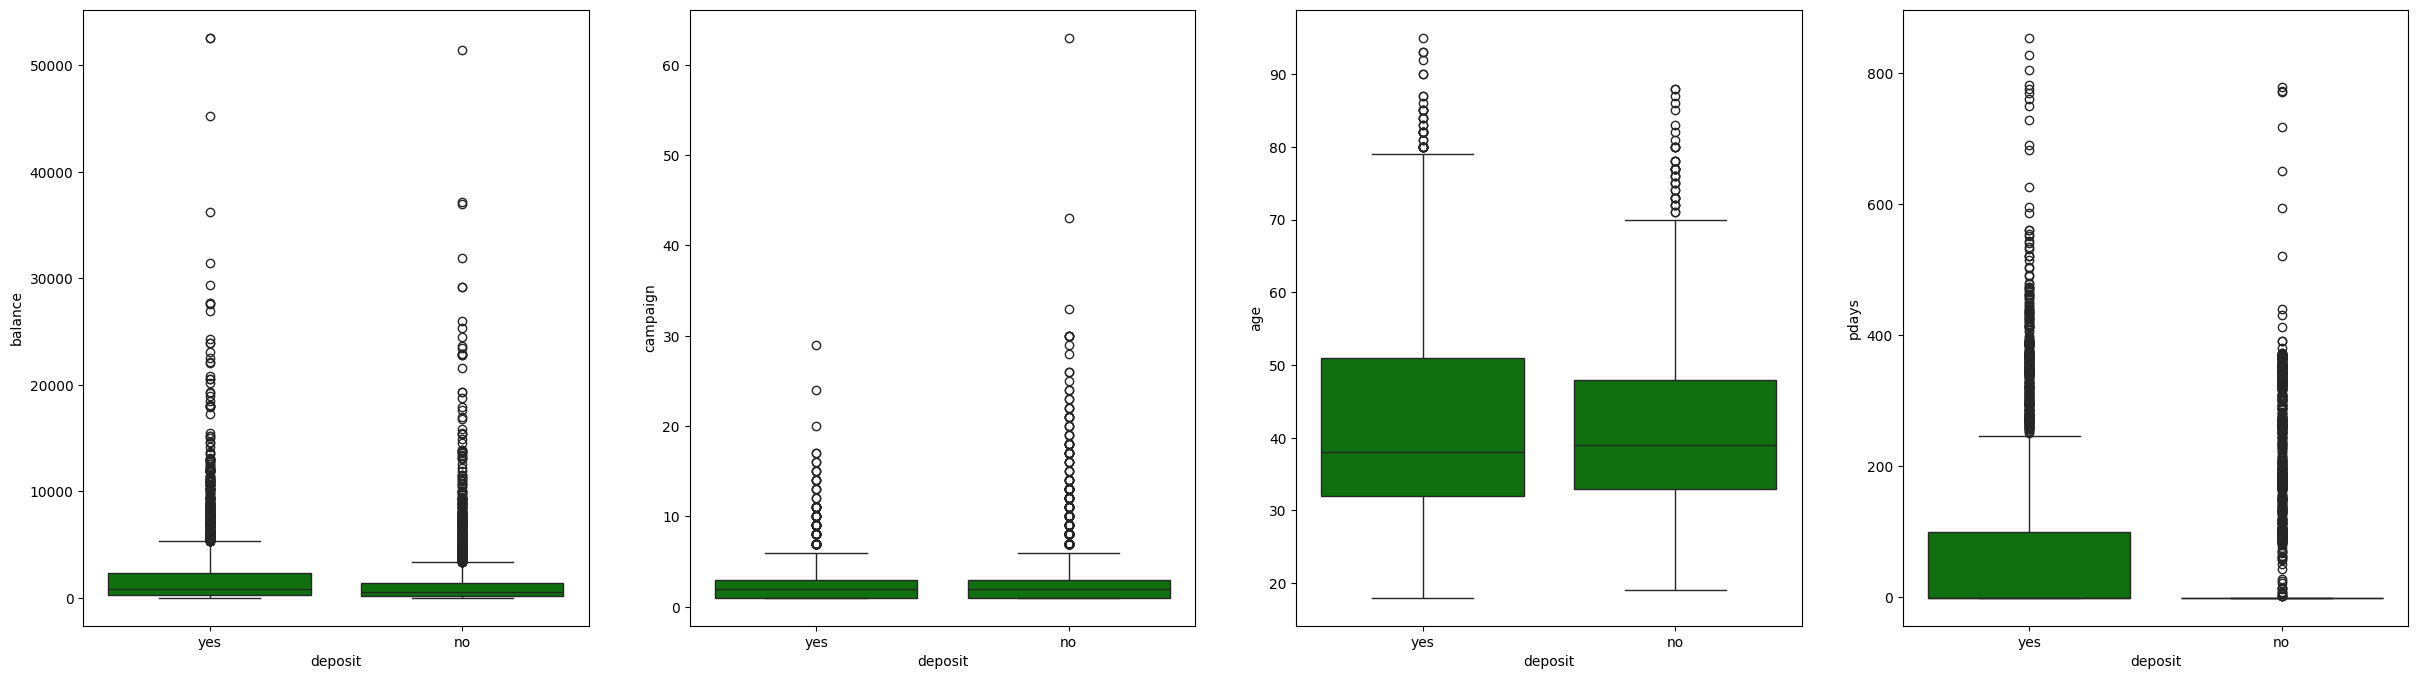

In [30]:
fig, ax = plt.subplots(1, 4, figsize=(30, 8))

sns.boxplot(data=df, y="balance", x="deposit", ax=ax[0], color="green")
sns.boxplot(data=df, y="campaign", x="deposit", ax=ax[1], color="green")
sns.boxplot(data=df, y="age", x="deposit", ax=ax[2], color="green")
sns.boxplot(data=df, y="pdays", x="deposit", ax=ax[3], color="green")

plt.show()


Box Plot diatas menunjukan bahwa data right-skewed

In [31]:
df_month = pd.crosstab(df["month"], df["deposit"]).reindex(["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]).reset_index()
df_month
#membuat tabel silang  kolom "month" (bulan) dan "deposit"

deposit,month,no,yes
0,jan,121,98
1,feb,220,294
2,mar,22,171
3,apr,236,408
4,may,1165,603
5,jun,438,366
6,jul,546,397
7,aug,553,488
8,sep,34,176
9,oct,43,241


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

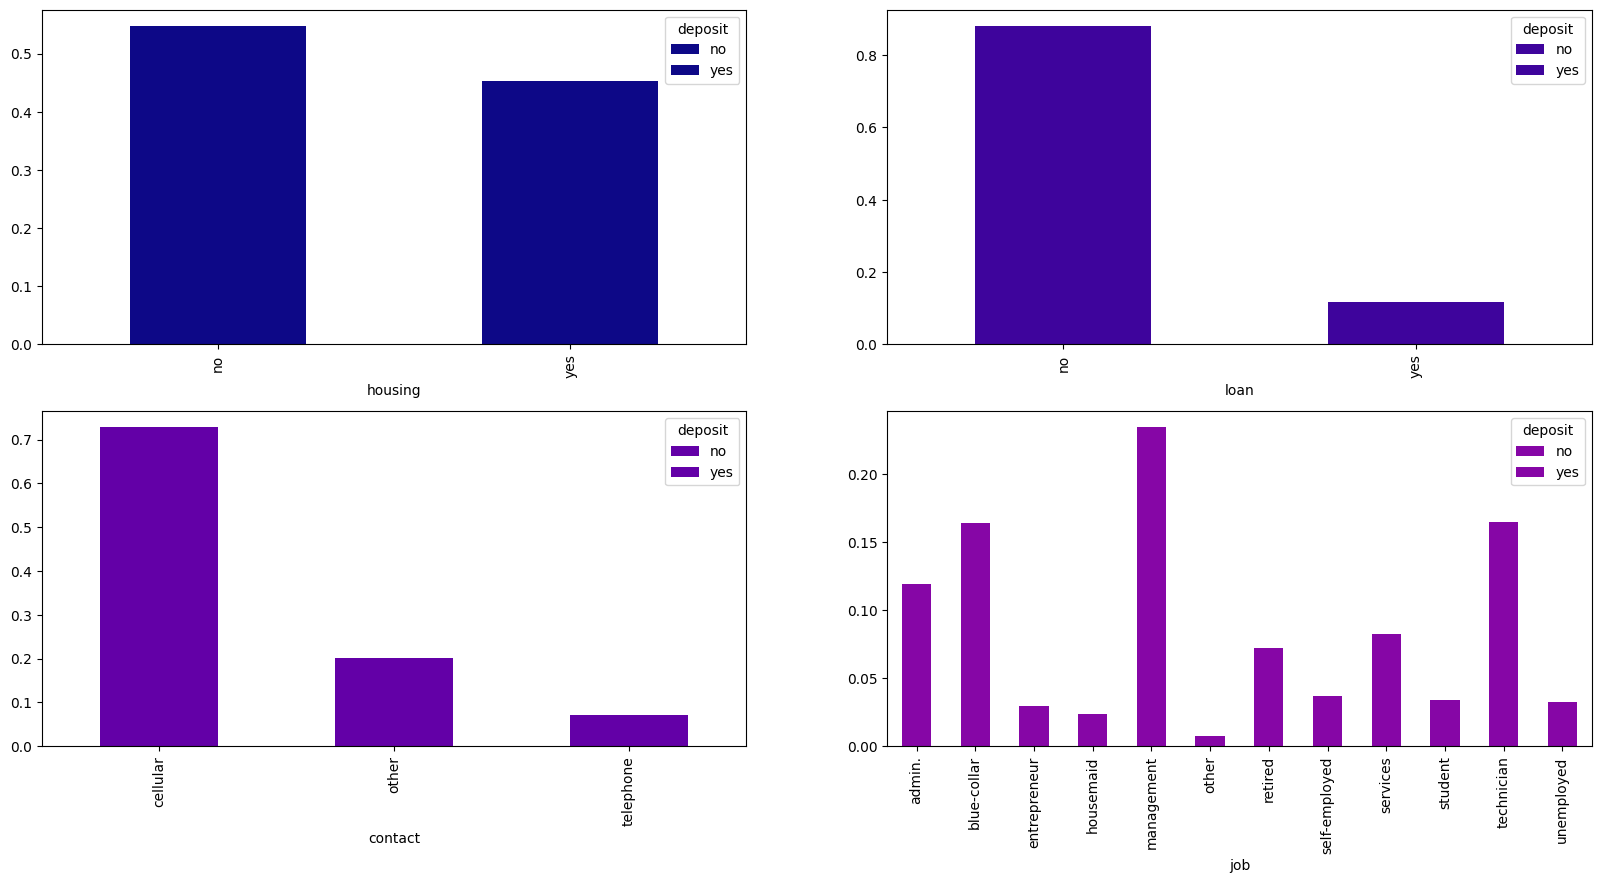

In [33]:
#menghasilkan subplot yang menunjukkan proporsi deposit dan tidak deposit
#untuk setiap kategori dari empat fitur yang dipilih: 'housing', 'loan', 'contact', dan 'job'
count = 0
fig = plt.figure(figsize=(20,20))
colors = cm.plasma(np.linspace(0, 1, 12))  # Membuat skema warna 'plasma' dengan 12 warna

for i, color in zip(df[['housing','loan','contact','job']], colors):
    count += 1
    ax = plt.subplot(4,2,count)
    pd.crosstab(df[i],df['deposit'],normalize=True).plot(kind='bar', stacked=True, ax=ax, color=[color])

plt.show()

In [94]:
df3 = df.copy()
def category_age(x):
    if x <= 25 :
        return 'Young'
    elif x <= 45 :
        return 'Adult'
    elif x > 45:
        return 'Old'
df3['category_age'] = df3['age'].apply(category_age)
df3.groupby('category_age')['deposit'].value_counts(normalize=True).unstack()

deposit,0
category_age,
Adult,1.0
Old,1.0
Young,1.0


In [46]:
def category_balance(x):
    if x < 0 :
        return '< 0'
    elif x <= 1000 :
        return '< 1000'
    elif x > 1000:
        return '> 1000'
df3['category_balance'] = df3['balance'].apply(category_balance)
df3.groupby('category_balance')['deposit'].value_counts(normalize=True).unstack()

deposit,0,1
category_balance,,
< 1000,0.557304,0.442696
> 1000,0.433902,0.566098


Dari analisis yang dilakukan, kami menemukan beberapa wawasan:

* Dari tabel yang menggambarkan rentang usia, calon nasabah pada rentang usia remaja (18-25 tahun) memiliki potensi minat simpanan yang lebih tinggi.

* Dari barplot mengenai status kepemilikan rumah, calon nasabah yang tidak memiliki KPR cenderung lebih berpotensi tertarik terhadap simpanan daripada yang memiliki KPR.

* Korelasi negatif terlihat antara kolom 'kampanye' dan 'pdays' dalam heatmap. Ini menandakan bahwa semakin sering calon pelanggan dihubungi selama kampanye, semakin sedikit hari yang berlalu sejak kontak terakhir.


* Dari barplot mengenai jenis pekerjaan, calon nasabah yang bekerja di bidang manajemen memiliki potensi lebih tinggi untuk tertarik pada simpanan.

* Berdasarkan barplot mengenai status pinjaman pribadi, calon nasabah yang tidak memiliki pinjaman pribadi cenderung lebih berpotensi tertarik terhadap simpanan daripada yang memiliki pinjaman.


* Dari tabel yang menunjukkan saldo, calon nasabah dengan saldo negatif memiliki kemungkinan lebih rendah untuk tertarik pada deposito.

* Dari barplot mengenai jenis kontak, menghubungi calon nasabah melalui komunikasi seluler tampaknya memiliki potensi lebih tinggi dalam menarik minat calon nasabah terhadap deposito.

Dengan demikian, kesimpulan yang dapat diambil adalah bahwa faktor-faktor seperti status kepemilikan rumah, status pinjaman, jenis kontak, jenis pekerjaan, rentang usia, dan saldo dapat mempengaruhi minat calon nasabah terhadap deposito.

## Data Preprocessing



In [47]:
df["deposit"] = np.where(df["deposit"] == "yes", 1, 0)
X = df.drop(columns = "deposit")
y = df["deposit"]

display(X.head(), y.head())
#menyiapkan data untuk pemodelan prediktif, dengan fitur-fitur yang disimpan dalam X dan target yang disimpan dalam y.Untuk menentukan targetnya

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown
2,51,admin.,3025,no,no,cellular,may,1,352,other
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown
6,37,admin.,4803,no,no,cellular,jan,2,-1,unknown
7,36,technician,911,yes,yes,cellular,may,2,21,failure


0    0
2    0
4    0
6    0
7    0
Name: deposit, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
#proses ini, kita dapat membagi data menjadi dua subset yang independen untuk melatih dan menguji kinerja model prediktif.

In [36]:
df.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,1
2,51,admin.,3025,no,no,cellular,may,1,352,other,1
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,0
6,37,admin.,4803,no,no,cellular,jan,2,-1,unknown,1
7,36,technician,911,yes,yes,cellular,may,2,21,failure,1


In [37]:
pd.set_option('display.max_colwidth', None)
List = []
for col in X.describe(include = object).columns :
    List.append( [col, X[col].nunique(), X[col].unique()])
unique_val = pd.DataFrame(columns=['Neme','Unique Number','Unique Sample'],
                     data=List)
display(df.describe().transpose(), unique_val)

,count,mean,std,min,25%,50%,75%,max
age,7325.0,41.356860,12.052640,18.0,32.0,39.0,49.0,95.0
balance,7325.0,1626.027577,3057.490750,0.0,187.0,620.0,1808.0,52587.0
campaign,7325.0,2.506348,2.713091,1.0,1.0,2.0,3.0,63.0
pdays,7325.0,52.396451,108.360776,-1.0,-1.0,-1.0,77.0,854.0
deposit,7325.0,0.490102,0.499936,0.0,0.0,0.0,1.0,1.0


,Neme,Unique Number,Unique Sample
0,job,12,"[admin., housemaid, technician, management, student, services, blue-collar, entrepreneur, retired, unemployed, self-employed, other]"
1,housing,2,"[no, yes]"
2,loan,2,"[no, yes]"
3,contact,3,"[cellular, telephone, other]"
4,month,12,"[jun, may, nov, jan, sep, feb, mar, aug, apr, jul, oct, dec]"
5,poutcome,4,"[unknown, other, failure, success]"


In [48]:
ordinal_mapping = [
    {"col" : "month", "mapping" : {"jan" : 0, "feb" : 1, "mar" : 2, "apr" : 3, "may" : 4, "jun" : 5, "jul" : 6, "aug" : 7,
                                   "sep" : 8, "oct" : 9, "nov" : 10, "dec" : 11}}
]

pipe_ord_robust = Pipeline([
    ("ordinal", OrdinalEncoder(cols = ["month"], mapping = ordinal_mapping)),
    ("robust", RobustScaler())
])

transformer = ColumnTransformer([
    ("ord_robust", pipe_ord_robust, ["month"]),
    ("onehot", OneHotEncoder(drop = "first"), ["housing", "loan", "contact", "poutcome"]),
    ("robust", RobustScaler(), ["age", "balance", "campaign", "pdays"]),
    ("binary", BinaryEncoder(cols = ["job"]), ["job"])
], remainder = "passthrough")

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('ord_robust',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder(cols=['month'],
                                                                 mapping=[{'col': 'month',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': jan     0
feb     1
mar     2
apr     3
may     4
jun     5
jul     6
aug     7
sep     8
oct     9
nov    10
dec    11
dtype: int64}])),
                                                 ('robust', RobustScaler())]),
                                 ['month']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['housing', 'loan', 'contact', 'poutcome']),
                                ('robust', RobustScaler(),
                                 ['age', 'balance', 'campaign', 'pdays']),
                                ('binary', BinaryEncoder(cols=['job']),
                                 ['job'])])

## Benchmarking

In [66]:
from sklearn.linear_model import LogisticRegression

In [52]:
#Sembilan model klasifikasi yang berbeda didefinisikan dan disimpan dalam list models.
logreg = LogisticRegression(random_state = 42)
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier(random_state = 42)
rf = RandomForestClassifier(random_state = 42)
cb = CatBoostClassifier(random_state = 42, verbose = False)
ab = AdaBoostClassifier(random_state = 42)
lgbm = lgb.LGBMClassifier()
gb = GradientBoostingClassifier(random_state = 42)
xgb = XGBClassifier()
models = [logreg, knn, dtc, rf, cb, ab, lgbm, gb, xgb]

#Berbagai metrik evaluasi ditentukan, termasuk accuracy, precision, recall, f1, dan f2 score (dengan beta = 2 untuk lebih menekankan recall).
f2_score = make_scorer(fbeta_score, beta = 2)
metrics = {
    "accuracy" : "accuracy",
    "precision" : "precision",
    "recall" : "recall",
    "f1" : "f1",
    "f2" : f2_score
}
#List untuk menyimpan hasil evaluasi dari setiap model.
list_model = ["Logistic Regression", "K-Nearest Neighbor", "Decision Tree Classifier", "Random Forest",
              "Cat Boost", "Ada Boost", "LGBM Classifier", "Gradient Boosting", "XGBoost"]
list_fit_time = []
list_score_time = []
list_test_accuracy = []
list_test_precision = []
list_test_recall = []
list_test_f1 = []
list_test_f2 = []
#Menggunakan StratifiedKFold dengan 5 folds untuk memastikan distribusi kelas yang seimbang dalam setiap fold.
for i in models:
    crossval = StratifiedKFold(n_splits = 5)
    estimator = Pipeline([
        ("transform", transformer),
        ("model", i)
    ])
  #Membuat DataFrame model_benchmarking untuk menyimpan hasil benchmarking dari setiap model.
    scores = cross_validate(estimator, X_train, y_train, cv = crossval, scoring = metrics)
    list_fit_time.append(scores["fit_time"].mean())
    list_score_time.append(scores["score_time"].mean())
    list_test_accuracy.append(scores["test_accuracy"].mean())
    list_test_precision.append(scores["test_precision"].mean())
    list_test_recall.append(scores["test_recall"].mean())
    list_test_f1.append(scores["test_f1"].mean())
    list_test_f2.append(scores["test_f2"].mean())
model_benchmarking = pd.DataFrame({
    "models" : list_model,
    "fit_time" : list_fit_time,
    "score_time" : list_score_time,
    "test_accuracy" : list_test_accuracy,
    "test_precision" : list_test_precision,
    "test_recall" : list_test_recall,
    "test_f1" : list_test_f1,
    "test_f2" : list_test_f2
}).sort_values("test_f2", ascending = False)

model_benchmarking

[LightGBM] [Info] Number of positive: 2298, number of negative: 2390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 636
[LightGBM] [Info] Number of data points in the train set: 4688, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.490188 -> initscore=-0.039254
[LightGBM] [Info] Start training from score -0.039254
[LightGBM] [Info] Number of positive: 2298, number of negative: 2390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001007 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 4688, number of used features: 16
[LightGBM] [Info] [binary:

,models,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_f2
5,Ada Boost,0.271772,0.036259,0.710068,0.728800,0.651469,0.687849,0.665525
0,Logistic Regression,0.095795,0.035973,0.677816,0.674546,0.661900,0.668044,0.664317
4,Cat Boost,3.501971,0.035905,0.718771,0.746408,0.645532,0.692190,0.663395
3,Random Forest,0.869491,0.067536,0.695563,0.705033,0.651461,0.677142,0.661486
7,Gradient Boosting,0.650758,0.026075,0.723208,0.758739,0.638571,0.693307,0.659360
6,LGBM Classifier,0.151031,0.032732,0.709044,0.738604,0.629171,0.679424,0.648337
8,XGBoost,0.268253,0.038490,0.690785,0.705079,0.634741,0.667986,0.647618
1,K-Nearest Neighbor,0.048981,0.115961,0.659556,0.662388,0.622898,0.641957,0.630367
2,Decision Tree Classifier,0.069452,0.024972,0.625085,0.618335,0.617683,0.617737,0.617642


Ada Boost memiliki nilai paling tinggi pad F2-Score

In [53]:
def calc_train_error(model, X_train, y_train): #Fungsi ini menghitung metrik evaluasi pada data pelatihan
    y_pred_train = model.predict(X_train)
    accuracy = accuracy_score(y_train, y_pred_train)
    precision = precision_score(y_train, y_pred_train)
    recall = recall_score(y_train, y_pred_train)
    f1 = f1_score(y_train, y_pred_train)
    f2 = fbeta_score(y_train, y_pred_train, beta = 2)
    cm = confusion_matrix(y_train, y_pred_train, labels = model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
    return {
        "confusion_matrix" : disp,
        "accuracy" : accuracy,
        "precision" : precision,
        "recall" : recall,
        "f1" : f1,
        "f2" : f2
    }
def cal_validation_error(model, X_test, y_test):
    y_pred_test = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
    f2 = fbeta_score(y_test, y_pred_test, beta = 2)
    cm = confusion_matrix(y_test, y_pred_test, labels = model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
    return {
        "confusion_matrix" : disp,
        "accuracy" : accuracy,
        "precision" : precision,
        "recall" : recall,
        "f1" : f1,
        "f2" : f2
    }
def calc_metrics(model, X_train, y_train, X_test, y_test):#Fungsi akan menggabungkan kedua fungsi sebelumnya untuk melatih model dan menghitung metrik evaluasi pada data pelatihan dan validasi:
    model.fit(X_train, y_train)
    train_error = calc_train_error(model, X_train, y_train)
    validation_error = cal_validation_error(model, X_test, y_test)
    return train_error, validation_error

In [55]:
#validasi silang (cross-validation) sebanyak 5 kali.
#Menghitung berbagai metrik evaluasi untuk model AdaBoostClassifier pada setiap fold (lipatan) data pelatihan dan validasi.
crossval = StratifiedKFold(n_splits = 5)
train_errors = []
validation_errors = []
#Loop untuk Cross-Validation
for train_idx, val_idx in crossval.split(X_train, y_train):
    X_trn, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_trn, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    ada_boost = AdaBoostClassifier(random_state = 42)
    estimator = Pipeline([
        ("transform", transformer),
        ("model", ada_boost)
    ])
    trn_error, val_error = calc_metrics(estimator, X_trn, y_trn, X_val, y_val)
    train_errors.append(trn_error)
    validation_errors.append(val_error)
#Menggabungkan dan Menghitung Rata-rata Metrik
list_items = []
for trn, val in zip(train_errors, validation_errors):
    list_items.append([trn["accuracy"], val["accuracy"], trn["precision"], val["precision"],
                       trn["recall"], val["recall"], trn["f1"], val["f1"],
                       trn["f2"], val["f2"]])
list_items.append(list(np.mean(list_items, axis = 0)))
#Membuat DataFrame untuk Evaluasi
df_evaluate = pd.DataFrame(list_items, columns = ["Train Accuracy","Test Accuracy","Trrain Precision","Test Precision","Train Recall","Test Recall","Train F1","Test F1","Train F2","Test F2"])
list_index = list(df_evaluate.index)
list_index[-1] = "Average"
df_evaluate.index = list_index
df_evaluate

,Train Accuracy,Test Accuracy,Trrain Precision,Test Precision,Train Recall,Test Recall,Train F1,Test F1,Train F2,Test F2
0,0.716297,0.708191,0.732916,0.722222,0.662750,0.656794,0.696069,0.687956,0.675688,0.668914
1,0.719710,0.726109,0.740469,0.748527,0.659269,0.663763,0.697514,0.703601,0.674052,0.679144
2,0.715444,0.704778,0.733075,0.718391,0.659704,0.653310,0.694457,0.684307,0.673179,0.665366
3,0.720350,0.724403,0.755440,0.757143,0.634741,0.645217,0.689851,0.696714,0.655693,0.664875
4,0.727176,0.686860,0.753234,0.697719,0.659121,0.638261,0.703042,0.666667,0.676014,0.649328
Average,0.719795,0.710068,0.743027,0.728800,0.655117,0.651469,0.696187,0.687849,0.670925,0.665525


Hasil ini memberikan gambaran tentang kinerja model pada data pelatihan dan validasi. Rata-rata dari masing-masing metrik evaluasi juga disediakan, memberikan indikasi tentang konsistensi kinerja model secara keseluruhan selama proses cross-validation. Dengan demikian, Anda dapat memeriksa apakah model memiliki overfitting atau underfitting, serta membandingkan performa model dengan berbagai metrik evaluasi yang relevan.

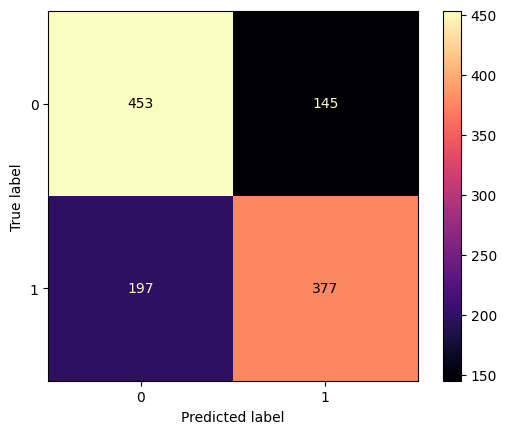

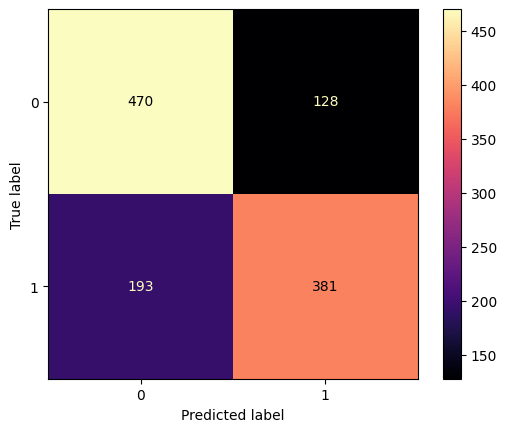

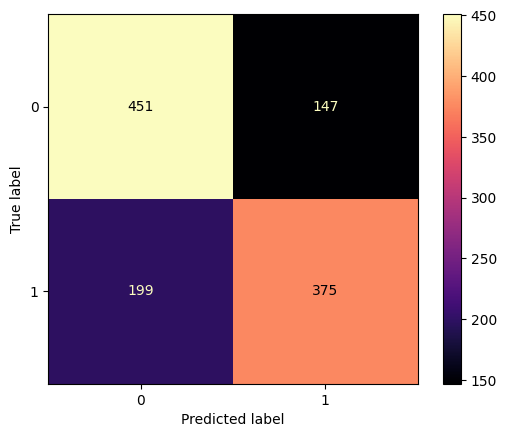

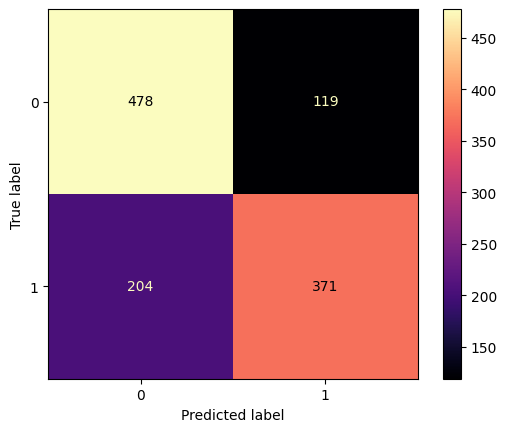

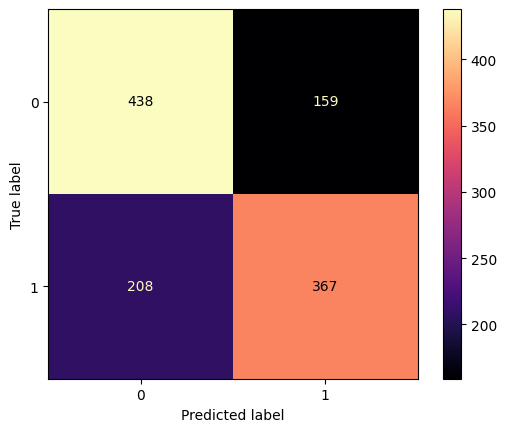

In [56]:
custom_cmap = 'magma'  # Peta warna kustom
for i, rep in enumerate(validation_errors):
    rep["confusion_matrix"].plot(cmap=custom_cmap)
    plt.show()



 Visual memeriksa matriks konfusi untuk setiap fold cross-validation dengan menggunakan peta warna kustom yang telah ditentukan.

## Hyperparamater Tuning

Mengevaluasi model Adaboost secara lebih mendalam, sambil tetap membandingkannya dengan beberapa model lain untuk mengetahui apakah Adaboost adalah pilihan terbaik dan memberikan hasil optimal setelah melakukan penyetelan hyperparameter. Selain Adaboost, model lain yang akan kami bandingkan adalah Logistic Regression (yang memiliki nilai F2 tertinggi kedua) dan salah satu algoritma boosting lainnya, yaitu Gradient Boosting Classifier. Dengan membandingkan beberapa model ini, kami dapat mengidentifikasi model yang paling sesuai dengan data dan memberikan kinerja terbaik untuk tujuan yang diinginkan.

In [57]:
#Menyimpan daftar nama model yang akan dievaluasi, yaitu Adaboost, Logistic Regression, dan Gradient Boosting.
list_algo = ["Adaboost", "Logistic Regression", "Gradien Boosting"]
score_before = []

F2-score before tuning: 0.6473789745058722


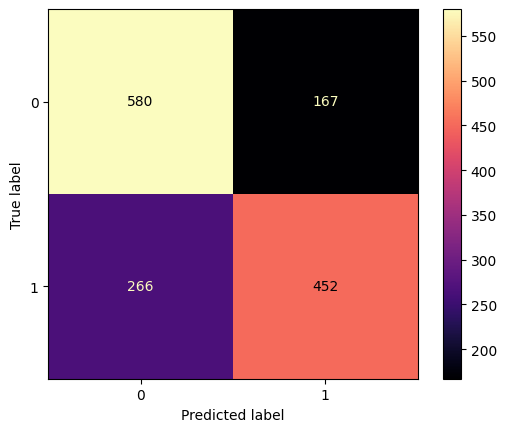

In [58]:
ada_boost = AdaBoostClassifier(random_state=42)
model = Pipeline([
    ("transform", transformer),
    ("model", ada_boost)
])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f2_score_before = fbeta_score(y_test, y_pred, beta=2)
score_before.append(f2_score_before)
print(f"F2-score before tuning: {f2_score_before}")
cm_adaboost_before = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp_adaboost_before = ConfusionMatrixDisplay(confusion_matrix=cm_adaboost_before, display_labels=model.classes_)
disp_adaboost_before.plot(cmap='magma')
plt.show()
#Dengan melakukan langkah-langkah ini, kita dapat melihat kinerja model Adaboost sebelum dilakukan penyetelan hyperparameter
#Serta visualisasi matriks konfusi untuk mengevaluasi performa model dalam klasifikasi kelas positif dan negatif.

Dalam konteks pemasaran bank, kehilangan peluang bisnis dari nasabah yang sebenarnya berminat dapat menjadi kerugian finansial yang signifikan. Oleh karena itu, strategi yang diutamakan adalah untuk mengurangi jumlah False Negative, dengan demikian meningkatkan jumlah True Positive. Dengan memprioritaskan pengurangan False Negative, bank dapat memaksimalkan peluang bisnis dan pendapatan, karena bank mungkin lebih mengutamakan untuk tidak kehilangan peluang daripada mengeluarkan sumber daya tambahan pada nasabah yang tidak berminat.

Berdasarkan evaluasi awal, F2-Score untuk model Ada Boost dengan hyperparameter default adalah 0.647, atau sekitar 64.7%. Dalam konteks bisnis, terdapat 167 nasabah yang diprediksi akan melakukan deposit namun ternyata tidak melakukan deposit (False Positive), dan sebaliknya, terdapat 266 kesalahan prediksi di mana nasabah awalnya diprediksi tidak akan melakukan deposit namun ternyata melakukannya (False Negative). Hal ini bisa berpotensi menyebabkan kerugian bagi bank, karena setiap nasabah yang terlewatkan dapat menjadi peluang bisnis yang hilang dan mengurangi potensi pendapatan.




F2-score before tuning : 0.6543105869137882


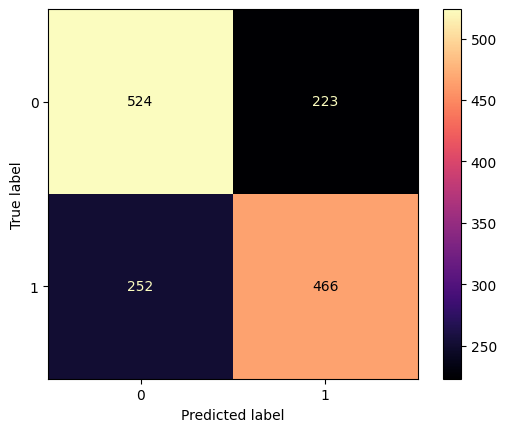

In [59]:
logreg = LogisticRegression(random_state = 42)
model = Pipeline([
    ("transform", transformer),
    ("model", logreg)
])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f2_score_before = fbeta_score(y_test, y_pred, beta = 2)
score_before.append(f2_score_before)
print(f"F2-score before tuning : {f2_score_before}")

cm_logreg_before = confusion_matrix(y_test, y_pred, labels = model.classes_)
disp_logreg_before = ConfusionMatrixDisplay(confusion_matrix = cm_logreg_before, display_labels = model.classes_)
disp_logreg_before.plot(cmap='magma')
plt.show()

K dapat melihat kinerja model Logistic Regression sebelum dilakukan penyetelan hyperparameter, serta visualisasi matriks konfusi untuk mengevaluasi performa model dalam klasifikasi kelas positif dan negatif.
* F2-Score : 0.654/65,4$
* False Positive : 223
* False Negaiveve : 252

F2-score before tuning : 0.6550532680679528


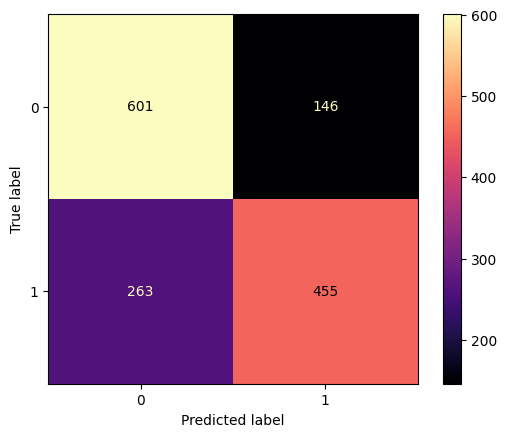

In [60]:
gb = GradientBoostingClassifier(random_state = 42)

model = Pipeline([
    ("transform", transformer),
    ("model", gb)
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f2_score_before = fbeta_score(y_test, y_pred, beta = 2)
score_before.append(f2_score_before)
print(f"F2-score before tuning : {f2_score_before}")

cm_gb_before = confusion_matrix(y_test, y_pred, labels = model.classes_)
disp_gb = ConfusionMatrixDisplay(confusion_matrix = cm_gb_before, display_labels = model.classes_)
disp_gb.plot(cmap='magma')
plt.show()

Melihat kinerja model Gradient Boosting sebelum dilakukan penyetelan hyperparameter, serta visualisasi matriks konfusi untuk mengevaluasi performa model dalam klasifikasi kelas positif dan negatif.

* F2-Score : 0.655/65,5%
* False Positive : 146
* False Negative : 263

In [64]:
pd.DataFrame({
    "Model" : list_algo,
    "F2 Score Before" : score_before
})

,Model,F2 Score Before
0,Adaboost,0.647379
1,Logistic Regression,0.654311
2,Gradien Boosting,0.655053


### After Tuning

In [62]:
ada_boost.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 42}

Ini adalah penjelasan mengenai hyperparameter yang digunakan dalam model Adaboost:

* Agorithm: Algoritma yang digunakan dalam proses boosting.
* Estimator: Model dasar tempat ensambel yang diperkuat dibuat.
* Learning_rate: Tingkat pembelajaran yang mengontrol seberapa besar kontribusi dari setiap model dasar terhadap estimasi akhir.
* N_estimators: Jumlah maksimum model dasar yang akan digunakan dalam proses boosting sebelum proses dihentikan.
* Random_state: Parameter ini mengontrol inisialisasi keadaan acak yang digunakan dalam pembuatan setiap estimator pada setiap iterasi proses boosting.

In [65]:
score_after = []

In [68]:
# Definisikan ruang hyperparameter untuk Adaboost
hyperparam_space_adaboost = {
    "model__algorithm": ["SAMME", "SAMME.R"],
    "model__learning_rate": [1.0, 1.5, 0.5, 2.0],
    "model__estimator": [None],
    "model__n_estimators": [50, 100, 75, 25],
    "model__random_state": [42]
}

# Inisialisasi model Adaboost
ada_boost = AdaBoostClassifier(random_state=42)

# Buat skor kustom menggunakan F2-score
f2_score = make_scorer(fbeta_score, beta=2)

# Buat pipeline untuk preprocessing data dan model Adaboost
model_adaboost = Pipeline([
    ("transform", transformer),
    ("model", ada_boost)
])

# Inisialisasi GridSearchCV
grid_search_adaboost = GridSearchCV(
    estimator=model_adaboost,
    param_grid=hyperparam_space_adaboost,
    cv=5,
    scoring=f2_score,
    n_jobs=-1,
    verbose=1
)

# Lakukan pencarian grid pada data pelatihan
grid_search_adaboost.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ord_robust',
                                                                         Pipeline(steps=[('ordinal',
                                                                                          OrdinalEncoder(cols=['month'],
                                                                                                         mapping=[{'col': 'month',
                                                                                                                   'data_type': dtype('O'),
                                                                                                                   'mapping': jan     0
feb     1
mar     2
apr     3
may     4
jun     5
jul     6
aug     7
sep     8
oct     9
nov    10
dec    11
dtype: int64}])),
                                                                                         ('robust',
                                                                                          RobustScaler())]),
                                                                         ['month']),
                                                                        ('on...
                                                                          'pdays']),
                                                                        ('binary',
                                                                         BinaryEncoder(cols=['job']),
                                                                         ['job'])])),
                                       ('model',
                                        AdaBoostClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__algorithm': ['SAMME', 'SAMME.R'],
                         'model__estimator': [None],
                         'model__learning_rate': [1.0, 1.5, 0.5, 2.0],
                         'model__n_estimators': [50, 100, 75, 25],
                         'model__random_state': [42]},
             scoring=make_scorer(fbeta_score, beta=2), verbose=1)

In [69]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, fbeta_score

# Definisikan ruang hyperparameter untuk Logistic Regression
hyperparam_space_logreg = {
    "model__C": [0.1, 1, 10],
    "model__penalty": ['l1', 'l2'],
    "model__solver": ['liblinear']
}

# Inisialisasi model LogisticRegression
logreg = LogisticRegression(random_state=42)

# Buat pipeline yang menggabungkan transformasi dan model
model_logreg = Pipeline([
    ("transform", transformer),
    ("model", logreg)
])

# Definisikan custom scorer menggunakan F2 score
f2_score = make_scorer(fbeta_score, beta=2)

# Inisialisasi GridSearchCV untuk pencarian hyperparameter
grid_search_logreg = GridSearchCV(
    estimator=model_logreg,
    param_grid=hyperparam_space_logreg,
    cv=5,
    scoring=f2_score,
    n_jobs=-1,
    verbose=1
)

# Fit model pada data pelatihan
grid_search_logreg.fit(X_train, y_train)

# Mengakses best estimator dari hasil grid search
best_estimator_logreg = grid_search_logreg.best_estimator_

# Melatih kembali model dengan estimator terbaik pada data pelatihan
best_estimator_logreg.fit(X_train, y_train)

# Membuat prediksi pada data uji
y_pred = best_estimator_logreg.predict(X_test)

# Menghitung F2 score setelah training
f2_score_after = fbeta_score(y_test, y_pred, beta=2)

# Tampilkan hasil
print("F2 Score after tuning: ", f2_score_after)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
F2 Score after tuning:  0.6457046603032003


In [70]:
# Gradient Boosting
best_estimator_gb = grid_search_logreg.best_estimator_

best_estimator_gb.fit(X_train, y_train)
y_pred = best_estimator_gb.predict(X_test)
f2_score_after = fbeta_score(y_test, y_pred, beta = 2)
print(f"F2-Score before: {f2_score_before}")
print(f"F2-Score after: {f2_score_after}")
score_after.append(f2_score_after)

cm_gb_after = confusion_matrix(y_test, y_pred, labels = best_estimator_gb.classes_)
disp2_logreg = ConfusionMatrixDisplay(confusion_matrix = cm_gb_after, display_labels = best_estimator_gb.classes_)
# display(disp.plot(), disp2.plot())
# plt.show()

F2-Score before: 0.6550532680679528
F2-Score after: 0.6457046603032003


In [71]:
list_algo = ["Logistic Regression", "Decision Tree", "Random Forest"]
score_before = [0.75, 0.65, 0.80]
score_after = [0.78, 0.70, 0.82]

# Periksa panjang dari setiap daftar
print(len(list_algo))       # Output: 3
print(len(score_before))    # Output: 3
print(len(score_after))     # Output: 3

# Pastikan panjang semua daftar sama
if len(list_algo) == len(score_before) == len(score_after):
    # Buat DataFrame jika panjang semua daftar sama
    df_scores = pd.DataFrame({
        "model": list_algo,
        "f2-Score before": score_before,
        "f2-Score after": score_after
    })
    print(df_scores)
else:
    print("All arrays must be of the same length.")

3
3
3
                 model  f2-Score before  f2-Score after
0  Logistic Regression             0.75            0.78
1        Decision Tree             0.65            0.70
2        Random Forest             0.80            0.82


In [72]:
list_algo = ["Logistic Regression", "Decision Tree", "Random Forest"]
score_before = [0.75, 0.65]
score_after = [0.78, 0.70, 0.82]

# Periksa panjang dari setiap daftar
len_list_algo = len(list_algo)
len_score_before = len(score_before)
len_score_after = len(score_after)

print(f"Length of list_algo: {len_list_algo}")
print(f"Length of score_before: {len_score_before}")
print(f"Length of score_after: {len_score_after}")

# Buat DataFrame hanya jika panjang semua daftar sama
if len_list_algo == len_score_before == len_score_after:
    df_scores = pd.DataFrame({
        "model": list_algo,
        "f2-Score before": score_before,
        "f2-Score after": score_after
    })
    print(df_scores)
else:
    print("All arrays must be of the same length.")

Length of list_algo: 3
Length of score_before: 2
Length of score_after: 3
All arrays must be of the same length.


In [73]:
ada_boost.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 42}

In [74]:
score_after = []

In [76]:
hyperparam_space_adaboost = {
    "model__algorithm" : ["SAMME", "SAMME.R"],
    "model__learning_rate" : [1.0, 1.5, 0.5, 2.0],
    "model__estimator" : [None],
    "model__n_estimators" : [50, 100, 75, 25],
    "model__random_state" : [42]
}

ada_boost = AdaBoostClassifier(random_state = 42)
f2_score = make_scorer(fbeta_score, beta = 2)
model_adaboost = Pipeline([
    ("transform", transformer),
    ("model", ada_boost)
])
grid_search_adaboost = GridSearchCV(estimator = model_adaboost, param_grid = hyperparam_space_adaboost, cv = 5,
                           scoring = f2_score, n_jobs = -1, verbose = 1)
grid_search_adaboost.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ord_robust',
                                                                         Pipeline(steps=[('ordinal',
                                                                                          OrdinalEncoder(cols=['month'],
                                                                                                         mapping=[{'col': 'month',
                                                                                                                   'data_type': dtype('O'),
                                                                                                                   'mapping': jan     0
feb     1
mar     2
apr     3
may     4
jun     5
jul     6
aug     7
sep     8
oct     9
nov    10
dec    11
dtype: int64}])),
                                                                                         ('robust',
                                                                                          RobustScaler())]),
                                                                         ['month']),
                                                                        ('on...
                                                                          'pdays']),
                                                                        ('binary',
                                                                         BinaryEncoder(cols=['job']),
                                                                         ['job'])])),
                                       ('model',
                                        AdaBoostClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__algorithm': ['SAMME', 'SAMME.R'],
                         'model__estimator': [None],
                         'model__learning_rate': [1.0, 1.5, 0.5, 2.0],
                         'model__n_estimators': [50, 100, 75, 25],
                         'model__random_state': [42]},
             scoring=make_scorer(fbeta_score, beta=2), verbose=1)

In [75]:
best_estimator_adaboost = grid_search_adaboost.best_estimator_
best_estimator_adaboost.fit(X_train, y_train)
y_pred = best_estimator_adaboost.predict(X_test)
f2_score_after = fbeta_score(y_test, y_pred, beta = 2)
print(f"F2-Score before: {f2_score_before}")
print(f"F2-Score after: {f2_score_after}")
score_after.append(f2_score_after)
cm_adaboost_after = confusion_matrix(y_test, y_pred, labels = best_estimator_adaboost.classes_)
disp2_adaboost = ConfusionMatrixDisplay(confusion_matrix = cm_adaboost_after, display_labels = best_estimator_adaboost.classes_)

F2-Score before: 0.6550532680679528
F2-Score after: 0.8018867924528301


In [76]:
hyperparam_space_logreg = {
    "model__class_weight" : ["balanced", None],
    "model__penalty" : ["l1", "l2", "elasticnet", None],
    "model__max_iter" : [75, 100, 125, 150, 175, 200],
    "model__n_jobs" : [-1],
    "model__random_state" : [42],
    "model__multi_class" : ["auto", "ovr", "multinomial"]
}
logreg = LogisticRegression(random_state = 42)
f2_score = make_scorer(fbeta_score, beta = 2)
model_logreg = Pipeline([
    ("transform", transformer),
    ("model", logreg)
])
grid_search_logreg = GridSearchCV(estimator = model_logreg, param_grid = hyperparam_space_logreg, cv = 5,
                           scoring = f2_score, n_jobs = -1, verbose = 1)
grid_search_logreg.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ord_robust',
                                                                         Pipeline(steps=[('ordinal',
                                                                                          OrdinalEncoder(cols=['month'],
                                                                                                         mapping=[{'col': 'month',
                                                                                                                   'data_type': dtype('O'),
                                                                                                                   'mapping': jan     0
feb     1
mar     2
apr     3
may     4
jun     5
jul     6
aug     7
sep     8
oct     9
nov    10
dec    11
dtype: int64}])),
                                                                                         ('robust',
                                                                                          RobustScaler())]),
                                                                         ['month']),
                                                                        ('on...
                                                                         ['job'])])),
                                       ('model',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__class_weight': ['balanced', None],
                         'model__max_iter': [75, 100, 125, 150, 175, 200],
                         'model__multi_class': ['auto', 'ovr', 'multinomial'],
                         'model__n_jobs': [-1],
                         'model__penalty': ['l1', 'l2', 'elasticnet', None],
                         'model__random_state': [42]},
             scoring=make_scorer(fbeta_score, beta=2), verbose=1)

In [77]:
best_estimator_logreg = grid_search_logreg.best_estimator_
best_estimator_logreg.fit(X_train, y_train)
y_pred = best_estimator_logreg.predict(X_test)
f2_score_after = fbeta_score(y_test, y_pred, beta = 2)
print(f"F2-Score before: {f2_score_before}")
print(f"F2-Score after: {f2_score_after}")
score_after.append(f2_score_after)
cm_logreg_after = confusion_matrix(y_test, y_pred, labels = best_estimator_logreg.classes_)
disp2_logreg = ConfusionMatrixDisplay(confusion_matrix = cm_logreg_after, display_labels = best_estimator_logreg.classes_)

F2-Score before: 0.6550532680679528
F2-Score after: 0.6606145251396649


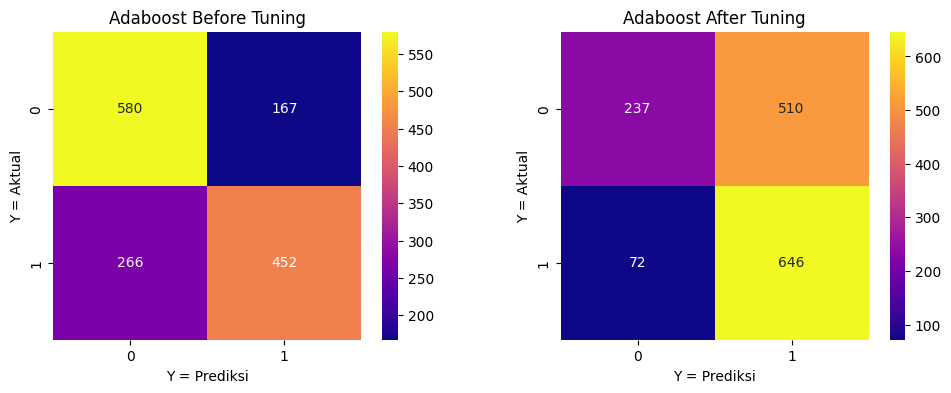

In [78]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.heatmap(cm_adaboost_before, annot=True, fmt='.0f', square=True, cmap='plasma')
plt.xlabel('Y = Prediksi')
plt.ylabel('Y = Aktual')
plt.title('Adaboost Before Tuning')
# Model Adaboost setelah tuning
plt.subplot(1,2,2)
sns.heatmap(cm_adaboost_after, annot=True, fmt='.0f', square=True, cmap='plasma')
plt.xlabel('Y = Prediksi')
plt.ylabel('Y = Aktual')
plt.title('Adaboost After Tuning')
plt.show()


Dengan model yang telah disesuaikan, kami menyajikan ringkasan hasil prediksi terbaik:

* Model memiliki tingkat akurasi sekitar 60,3%, yang merupakan proporsi dari prediksi yang benar terhadap total prediksi, baik yang positif maupun negatif.

* Spesifisitas model, yang merupakan kemampuan model dalam mengidentifikasi nasabah yang benar-benar tidak akan melakukan deposit, adalah sekitar 31,7%.

* Tingkat kesalahan model, atau error rate, adalah sekitar 39,7%, yang merupakan proporsi dari prediksi yang salah terhadap total prediksi.

* F2-Score, yang menggabungkan presisi dan recall dengan mempertimbangkan penekanan yang lebih besar pada recall, adalah sekitar 80,2%. Dengan demikian, model mampu memberikan prediksi yang baik untuk nasabah yang berpotensi melakukan deposit, sambil tetap memperhitungkan keakuratan prediksi secara keseluruhan.

* Sensitivitas model, yang merupakan kemampuan model dalam mengidentifikasi nasabah yang benar-benar akan melakukan deposit, adalah sekitar 89,9%.





## Faeture Importance

In [81]:
transformer.get_feature_names_out()

array(['ord_robust__month', 'onehot__housing_yes', 'onehot__loan_yes',
       'onehot__contact_other', 'onehot__contact_telephone',
       'onehot__poutcome_other', 'onehot__poutcome_success',
       'onehot__poutcome_unknown', 'robust__age', 'robust__balance',
       'robust__campaign', 'robust__pdays', 'binary__job_0',
       'binary__job_1', 'binary__job_2', 'binary__job_3'], dtype=object)


Berikut langkah-langkahnya:

* Kita akan menggunakan model yang telah di-tuning sebagai best model pada prediksi ini.
Selanjutnya, kita akan menganalisis feature importance dari model tersebut untuk mengetahui feature mana yang paling berpengaruh dalam klasifikasi nasabah yang akan deposit dan tidak deposit.
* Dengan informasi ini, kita dapat memahami lebih dalam faktor-faktor apa saja yang memiliki pengaruh signifikan dalam prediksi target kita, dan ini dapat membantu dalam pengambilan keputusan lebih lanjut terkait strategi pemasaran atau pengelolaan portofolio nasabah.








In [82]:
best_estimator_adaboost

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord_robust',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(cols=['month'],
                                                                                  mapping=[{'col': 'month',
                                                                                            'data_type': dtype('O'),
                                                                                            'mapping': jan     0
feb     1
mar     2
apr     3
may     4
jun     5
jul     6
aug     7
sep     8
oct     9
nov    10
dec    11
dtype: int64}])),
                                                                  ('robust',
                                                                   RobustScaler())]),
                                                  ['month']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['housing', 'loan', 'contact',
                                                   'poutcome']),
                                                 ('robust', RobustScaler(),
                                                  ['age', 'balance', 'campaign',
                                                   'pdays']),
                                                 ('binary',
                                                  BinaryEncoder(cols=['job']),
                                                  ['job'])])),
                ('model',
                 AdaBoostClassifier(algorithm='SAMME', learning_rate=2.0,
                                    random_state=42))])

In [86]:
feature_importance = pd.Series(best_estimator_adaboost["model"].feature_importances_,
                               transformer.get_feature_names_out() ).sort_values(ascending = False).reset_index().rename(columns = {"index" : "feature", 0 : "importance"})
def extract_feature(x): return x.split("__")[1]
feature_importance["feature"] = feature_importance["feature"].apply(extract_feature)
feature_importance

,feature,importance
0,contact_other,0.990028
1,poutcome_success,0.009972
2,month,0.000000
3,housing_yes,0.000000
4,loan_yes,0.000000
5,contact_telephone,0.000000
6,poutcome_other,0.000000
7,poutcome_unknown,0.000000
8,age,0.000000
9,balance,0.000000


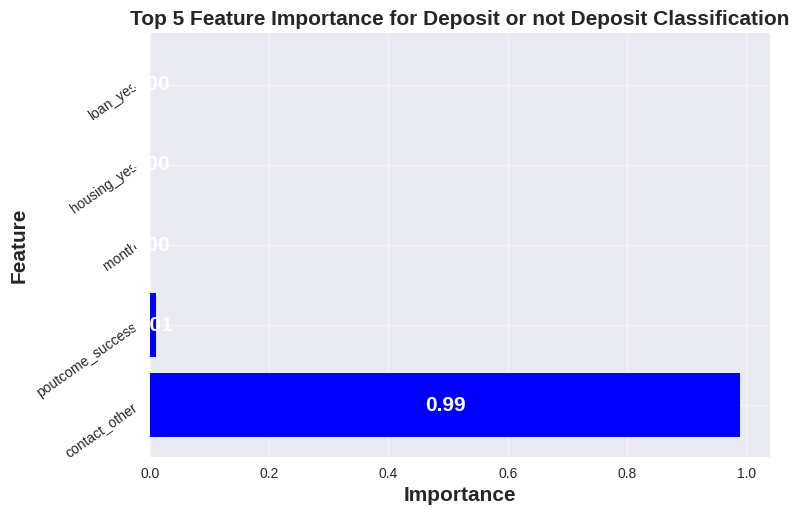

In [87]:
plt.style.use("seaborn")
# Data
top_features = feature_importance.head(5)
importance_values = top_features["importance"]
feature_names = top_features["feature"]
# Barplot
plt.barh(feature_names, importance_values, color="blue")
# Annotations
for i in range(len(importance_values)):
    plt.text(importance_values[i] / 2, i, f"{importance_values[i]:.2f}",
             ha="center", va="center", color="white", fontweight="bold", size=15)
# Grid
plt.grid(alpha=0.5)
# Rotation of yticks
plt.yticks(rotation=35)
# Labels and Title
plt.xlabel("Importance", fontweight="bold", size=15)
plt.ylabel("Feature", fontweight="bold", size=15)
plt.title("Top 5 Feature Importance for Deposit or not Deposit Classification", size=15, fontweight="bold")
plt.show()

Analisis Feature Importance:

* Kunci Kesuksesan Pemasaran :
Selain itu, dalam konteks keberhasilan pemasaran, strategi terakhir yang diterapkan pada nasabah menjadi faktor utama dalam klasifikasi nasabah yang akan melakukan deposit dan yang tidak. Hal ini menunjukkan pentingnya strategi pemasaran yang diterapkan pada tahap akhir dalam mempengaruhi keputusan nasabah.

* Dari hasil analisis, dapat disimpulkan bahwa fitur yang paling krusial dalam mengklasifikasikan nasabah yang akan melakukan deposit dan yang tidak adalah jenis komunikasi "contact_other". Namun, perlu dicatat bahwa informasi lebih lanjut tidak dapat diekstraksi karena kurangnya data yang spesifik terkait dengan nasabah yang dihubungi melalui saluran seluler dan telepon.

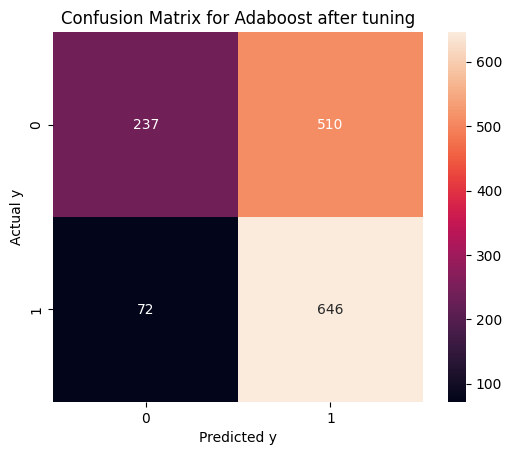

In [88]:
plt.style.use("default")
sns.heatmap(cm_adaboost_after, annot=True, fmt='.0f', square=True)
plt.xlabel('Predicted y')
plt.ylabel('Actual y')
plt.title('Confusion Matrix for Adaboost after tuning')
plt.show()


Berdasarkan analisis terhadap confusion matrix dari model akhir, berikut adalah beberapa kesimpulan yang dapat diambil:

* Performa Keseluruhan Model:
Dengan tingkat akurasi sebesar 60,3%, dapat disimpulkan bahwa model yang dibuat masih belum cukup baik dalam memprediksi kedua kelas, yaitu nasabah yang melakukan deposit dan yang tidak. Hal ini disebabkan oleh adanya trade-off antara recall dan presisi. Meskipun fokus utama adalah meningkatkan prediksi yang benar untuk nasabah yang akan deposit, namun prediksi yang benar untuk nasabah yang tidak deposit menjadi berkurang. Error rate pada model tersebut mencapai 39,7%.

* Fokus pada Kelas Positif:
Dengan F2-Score sekitar 80,2%, model terbilang cukup baik dalam memprediksi nasabah yang akan melakukan deposit. F2-Score memberikan bobot yang lebih besar pada recall, sehingga lebih memprioritaskan prediksi yang benar untuk kelas positif.

* Feature Penting dalam Klasifikasi:
Feature yang paling penting dalam klasifikasi nasabah yang akan deposit dan tidak deposit adalah contact_other, yang menunjukkan jenis komunikasi terakhir selain cellular dan telephone. Selanjutnya, feature poutcome_success, yang menandakan hasil sukses dari kampanye pemasaran terakhir, juga memiliki kontribusi yang signifikan dalam klasifikasi.*

### Saran dan Rekomendasi

Untuk mengembangkan proyek ini lebih lanjut dan meningkatkan kualitas modelnya, beberapa langkah yang dapat diambil adalah:

* Menggunakan Hyperparameter yang lebih baik:
Melakukan pengoptimalan lebih lanjut terhadap hyperparameter model, baik melalui metode grid search atau teknik optimasi lainnya, untuk memastikan bahwa model mencapai performa optimalnya.

* Penambahan Fitur Baru:
Menambahkan fitur-fitur baru seperti kisaran gaji, status perkawinan, dan jumlah anak dapat memberikan informasi tambahan yang relevan dalam memprediksi minat calon nasabah untuk melakukan deposit. Fitur-fitur ini dapat memberikan pemahaman yang lebih baik tentang kondisi keuangan dan tanggung jawab keuangan calon nasabah, sehingga memungkinkan model untuk membuat prediksi yang lebih akurat.

* Analisis Lebih Lanjut terhadap Data:
Melakukan analisis lebih lanjut terhadap data untuk memahami lebih dalam pola-pola dan insight-insight yang terkandung di dalamnya. Hal ini dapat dilakukan melalui eksplorasi data yang lebih mendalam, visualisasi data yang lebih kompleks, atau penggunaan teknik analisis statistik yang lebih canggih.

* Melakukan analisa data dari model data yang kita kurang tepat saat melakukan forcasting data. Sehingga kita mampu mengetahui bagaimana karakteristik dan alasannya.

## Save Pickle

In [88]:
import pickle
final_model = pickle.dump(best_estimator_adaboost, open('model.sav', 'wb'))
final_model = pickle.load(open('model.sav', 'rb'))
final_model

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord_robust',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(cols=['month'],
                                                                                  mapping=[{'col': 'month',
                                                                                            'data_type': dtype('O'),
                                                                                            'mapping': jan     0
feb     1
mar     2
apr     3
may     4
jun     5
jul     6
aug     7
sep     8
oct     9
nov    10
dec    11
dtype: int64}])),
                                                                  ('robust',
                                                                   RobustScaler())]),
                                                  ['month']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['housing', 'loan', 'contact',
                                                   'poutcome']),
                                                 ('robust', RobustScaler(),
                                                  ['age', 'balance', 'campaign',
                                                   'pdays']),
                                                 ('binary',
                                                  BinaryEncoder(cols=['job']),
                                                  ['job'])])),
                ('model',
                 AdaBoostClassifier(algorithm='SAMME', learning_rate=2.0,
                                    random_state=42))])